In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('../Data/data.csv')
print(data_df.shape)
data_df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data_df.drop(['id'], axis=1, inplace=True)
print(data_df.shape)
data_df.head()

(569, 32)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data_df['Unnamed: 32'].unique()

array([nan])

In [5]:
data_df.drop(['Unnamed: 32'], axis=1, inplace=True)
print(data_df.shape)

(569, 31)


In [6]:
print(f' Unique values for column, diagnosis: {data_df["diagnosis"].unique()}')

 Unique values for column, diagnosis: ['M' 'B']


In [7]:
data_df['diagnosis'] = data_df['diagnosis'].apply(lambda x: 0 if x=='M' else 1)

In [8]:
print(f' Unique values for column, diagnosis: {data_df["diagnosis"].unique()}')

 Unique values for column, diagnosis: [0 1]


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
X = data_df.drop(['diagnosis'], axis = 1)
y = data_df['diagnosis']

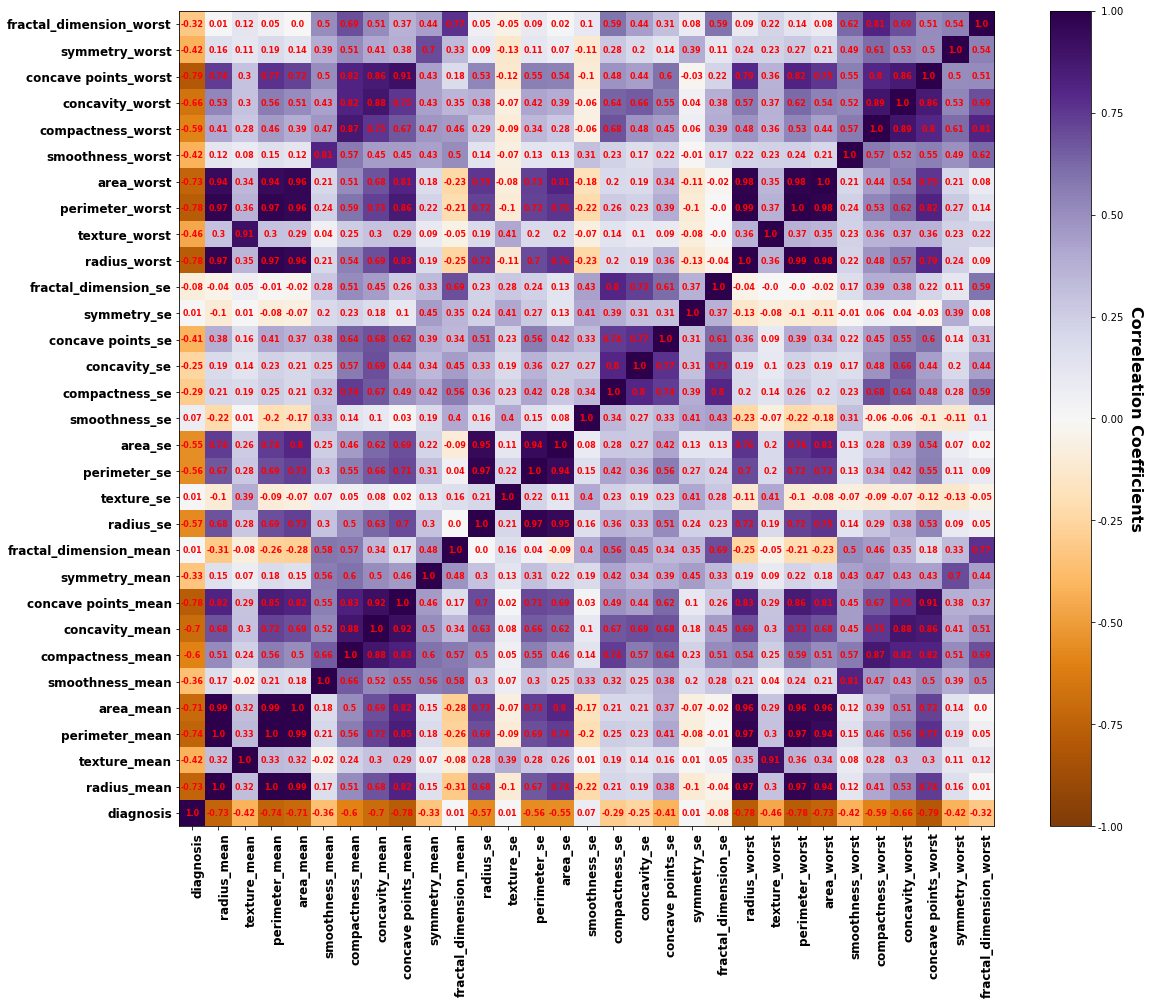

In [11]:
model_corr = data_df.corr(method='pearson')

corr_matrix_array = model_corr.to_numpy()
corr_matrix = np.around(corr_matrix_array, decimals=2)

predictors = data_df.columns.tolist()

fig, ax = plt.subplots(figsize=(20,15))
im = ax.imshow(corr_matrix, cmap='PuOr', origin='lower')
im.set_clim(-1, 1)
ax.grid(False)
ax.set_xticks(np.arange(len(predictors)))
ax.set_yticks(np.arange(len(predictors)))
ax.set_xticklabels(predictors, size=12, weight='bold')
ax.set_yticklabels(predictors, size=12, weight='bold')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

for i in range(len(predictors)):
    for j in range(len(predictors)):
        text = ax.text(j, i, corr_matrix[i, j], ha='center', va='center', color='red', size=8, weight='bold')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
cbar.ax.set_ylabel('Correleation Coefficients', rotation=-90, va='bottom', size=16, weight='bold')
plt.show()

 0) area_worst                     0.219255
 1) radius_worst                   0.171667
 2) perimeter_worst                0.114199
 3) area_mean                      0.091679
 4) area_se                        0.086681
 5) concave points_mean            0.079659
 6) compactness_worst              0.057900
 7) concavity_worst                0.024630
 8) smoothness_worst               0.022661
 9) concave points_worst           0.021610
10) texture_mean                   0.015750
11) fractal_dimension_worst        0.011826
12) texture_worst                  0.010551
13) symmetry_worst                 0.008721
14) concavity_mean                 0.007372
15) radius_mean                    0.007096
16) perimeter_mean                 0.006609
17) radius_se                      0.005543
18) perimeter_se                   0.005514
19) smoothness_mean                0.005386
20) fractal_dimension_mean         0.005144
21) concave points_se              0.004738
22) symmetry_se                 

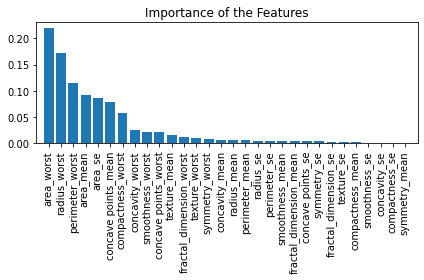

In [12]:
from sklearn.ensemble import RandomForestClassifier 
features_name = X.columns[0:32]
R_forest = RandomForestClassifier(n_estimators = 7, random_state = 25) 
R_forest.fit(X,y) 
importances = R_forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]): 
    print("%2d) %-*s %f" % (f,30,features_name[indices[f]],importances[indices[f]]))
plt.title('Importance of the Features') 
plt.bar(range(X.shape[1]),importances[indices],align = 'center')
plt.xticks(range(X.shape[1]),features_name[indices], rotation=90) 
plt.xlim([-1,X.shape[1]])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
scaler.fit_transform(X)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

Accuracy on training set: 94.73%
Accuracy on test set: 92.98%
[[33  6]
 [ 2 73]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        39
           1       0.92      0.97      0.95        75

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



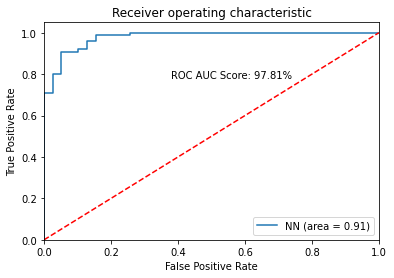

In [16]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes= 100, max_iter=1000, alpha=1, random_state=0)

mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2%}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2%}".format(mlp.score(X_test, y_test)))

# confusion matrix

y_pred = mlp.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Precision/Recall

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# calculate ROC AUC Score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probabilities = mlp.predict_proba(X_test)
roc = roc_auc_score(y_test, probabilities[:, 1])
roc_percentage = "{:.02%}".format(roc)

NN_roc_auc = roc_auc_score(y_test, mlp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NN (area = %0.2f)' % NN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.text(.38, .78, f"ROC AUC Score: {roc_percentage}")
plt.show()